In [318]:
import datetime

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [319]:
dataset = pd.read_csv("C:/Users/Rana Faizan/Downloads/dataset.csv")
dataset.head(5)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [320]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [321]:
dataset.shape

(6019, 14)

In [322]:
dataset.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [323]:
a = dataset.columns
for i in a:
    print(i)

Unnamed: 0
Name
Location
Year
Kilometers_Driven
Fuel_Type
Transmission
Owner_Type
Mileage
Engine
Power
Seats
New_Price
Price


In [324]:
dataset.count()

Unnamed: 0           6019
Name                 6019
Location             6019
Year                 6019
Kilometers_Driven    6019
Fuel_Type            6019
Transmission         6019
Owner_Type           6019
Mileage              6017
Engine               5983
Power                5983
Seats                5977
New_Price             824
Price                6019
dtype: int64

In [325]:
dataset.nunique()

Unnamed: 0           6019
Name                 1876
Location               11
Year                   22
Kilometers_Driven    3093
Fuel_Type               5
Transmission            2
Owner_Type              4
Mileage               442
Engine                146
Power                 372
Seats                   9
New_Price             540
Price                1373
dtype: int64

In [326]:
dataset.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

In [327]:
# For Object/String Types
dataset['Mileage']   = dataset['Mileage'].fillna(dataset['Mileage'].mode()[0])
dataset['Engine']     = dataset['Engine'].fillna(dataset['Engine'].mode()[0])
dataset['Seats'] = dataset['Seats'].fillna(dataset['Seats'].mode()[0])
dataset['Power'] = dataset['Power'].fillna(dataset['Power'].mode()[0])
dataset['New_Price'] = dataset['New_Price'].fillna(dataset['New_Price'].mode()[0])

In [328]:
dataset.isnull().sum()

Unnamed: 0           0
Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

Let's first split the dataset into train and test datasets.

In [428]:
X_train, X_test, y_train, y_test = train_test_split(dataset.iloc[:, :-1], 
                                                    dataset.iloc[:, -1], 
                                                    test_size = 0.2, 
                                                    random_state =50 )
X_train

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
2376,2376,Maruti Wagon R LXI CNG,Hyderabad,2013,83875,CNG,Manual,Second,26.6 km/kg,998 CC,58.16 bhp,5.0,4.78 Lakh
3498,3498,Maruti Swift VDI,Jaipur,2012,80000,Diesel,Manual,First,22.9 kmpl,1248 CC,74 bhp,5.0,4.78 Lakh
5351,5351,Volkswagen Polo Petrol Highline 1.2L,Pune,2010,79000,Petrol,Manual,Third,16.47 kmpl,1198 CC,73.9 bhp,5.0,4.78 Lakh
5191,5191,Ford Endeavour 2.2 Titanium AT 4X2,Chennai,2019,9000,Diesel,Automatic,First,12.62 kmpl,2198 CC,158 bhp,7.0,4.78 Lakh
5489,5489,Hyundai Verna 1.4 CRDi,Bangalore,2016,79000,Diesel,Manual,First,24.8 kmpl,1396 CC,88.7 bhp,5.0,4.78 Lakh
...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,132,Maruti Ritz VXI ABS,Coimbatore,2016,30232,Petrol,Manual,First,21.1 kmpl,1197 CC,85.80 bhp,5.0,4.78 Lakh
2014,2014,Volkswagen Polo 1.0 MPI Comfortline,Chennai,2016,42000,Petrol,Manual,Second,18.78 kmpl,999 CC,75 bhp,5.0,7.33 Lakh
1931,1931,Hyundai i10 Magna,Kolkata,2012,58235,Petrol,Manual,First,20.36 kmpl,1197 CC,78.9 bhp,5.0,4.78 Lakh
5600,5600,Honda Amaze SX i-DTEC,Kolkata,2014,84677,Diesel,Manual,First,25.8 kmpl,1498 CC,98.6 bhp,5.0,4.78 Lakh


In [429]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4815 entries, 2376 to 5808
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4815 non-null   int64  
 1   Name               4815 non-null   object 
 2   Location           4815 non-null   object 
 3   Year               4815 non-null   int64  
 4   Kilometers_Driven  4815 non-null   int64  
 5   Fuel_Type          4815 non-null   object 
 6   Transmission       4815 non-null   object 
 7   Owner_Type         4815 non-null   object 
 8   Mileage            4815 non-null   object 
 9   Engine             4815 non-null   object 
 10  Power              4815 non-null   object 
 11  Seats              4815 non-null   float64
 12  New_Price          4815 non-null   object 
dtypes: float64(1), int64(3), object(9)
memory usage: 526.6+ KB


## Exploratory Data Analysis

Let's explore the various columns and draw information about how useful each column is. I'll also modify the test data based on training data.

### Index

The first column is the index for each data point and hence we can simply remove it.

In [430]:
X_train = X_train.iloc[:, 1:]
X_test = X_test.iloc[:, 1:]

### Name

Let's explore the various cars in the dataset.

In [431]:
X_train["Name"].value_counts()

Mahindra XUV500 W8 2WD                      38
Maruti Swift VDI                            31
Maruti Ritz VDi                             28
Honda City 1.5 S MT                         28
Maruti Swift Dzire VDI                      26
                                            ..
Honda CR-V RVi MT                            1
Mahindra Bolero DI BSII                      1
Land Rover Range Rover 3.6 TDV8 Vogue SE     1
BMW 3 Series 330 Ci Convertible              1
Volkswagen Polo 1.0 MPI Comfortline          1
Name: Name, Length: 1696, dtype: int64


As it appears, there are several cars in the dataset, some of them with a count higher than 1.
Sometimes the resale value of a car also depends on manufacturer of car and hence, I'll extract the manufacturer from this column and add it to the dataset.

In [432]:
make_train = X_train["Name"].str.split(" ", expand = True)
make_test = X_test["Name"].str.split(" ", expand = True)

In [433]:
X_train["Manufacturer"] = make_train[0]
X_test["Manufacturer"] = make_test[0]

Let's also confirm that there are no null values and identify all unique values.

Text(0, 0.5, 'Count of cars')

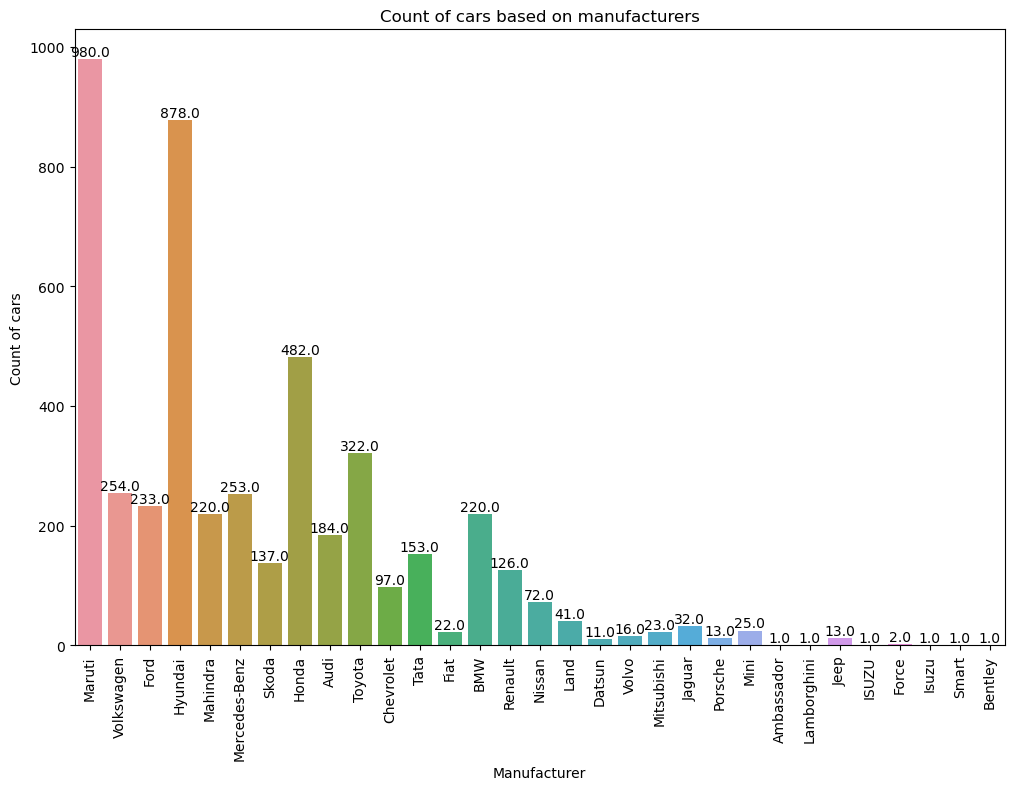

In [434]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = X_train)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

Maximum cars in the dataset are by the manufacturer **Maruti** and there are no null values.

I'll also drop the `Name` column.

In [435]:
X_train.drop("Name", axis = 1, inplace = True)
X_test.drop("Name", axis = 1, inplace = True)

### Location

Location should not be a determinant for the price of a car and I'll safely remove it.

In [436]:
X_train.drop("Location", axis = 1, inplace = True)
X_test.drop("Location", axis = 1, inplace = True)

### Year

Year has no significance on its own unless we try to extract how old a car is from this and see how its resale price may get affected.

In [437]:
curr_time = datetime.datetime.now()
X_train['Year'] = X_train['Year'].apply(lambda x : curr_time.year - x)
X_test['Year'] = X_test['Year'].apply(lambda x : curr_time.year - x)

### Fuel_Type, Transmission,  and Owner_Type

All these columns are categorical columns which should be converted to dummy variables before being used.

### Kilometers_Driven

`Kilometers_Driven` is a numerical column with a certain range of values.

In [438]:
X_train["Kilometers_Driven"]

2376    83875
3498    80000
5351    79000
5191     9000
5489    79000
        ...  
132     30232
2014    42000
1931    58235
5600    84677
5808    30000
Name: Kilometers_Driven, Length: 4815, dtype: int64

The data range is really varied and the high values might affect prediction, thus, it is really important that scaling be applied to this column for sure.

## Mileage

This column defines the mileage of the car. We need to extract the numerical value out of each string and save it.

In [439]:
mileage_train = X_train["Mileage"].str.split(" ", expand = True)
mileage_test = X_test["Mileage"].str.split(" ", expand = True)

X_train["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
X_test["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')

Let's check for missing values.

In [440]:
print(sum(X_train["Mileage"].isnull()))
print(sum(X_test["Mileage"].isnull()))

0
0


There is one missing value in each. I'll replace the missing value with the mean value of the column based on the training data.

In [441]:
X_train["Mileage"].fillna(X_train["Mileage"].astype("float64").mode(), inplace = True)
X_test["Mileage"].fillna(X_train["Mileage"].astype("float64").mode(), inplace = True)

### Engine, Power and Seats

The `Engine` values are defined in CC so I need to remove `CC` from the data. Similarly, `Power` has bhp, so I'll remove `bhp` from it. Also, as there are missing values in `Engine`, `Power` and `Seats`, I'll again replace them with the mean.

In [442]:
X_train["Engine"] = X_train["Engine"].astype(str)
X_test["Engine"] = X_test["Engine"].astype(str)



cc_train = X_train["Engine"].str.split(" ", expand=True)
cc_test = X_test["Engine"].str.split(" ", expand=True)

X_train["Engine"] = pd.to_numeric(cc_train[0], errors="coerce")
X_test["Engine"] = pd.to_numeric(cc_test[0], errors="coerce")

X_train["Power"] = X_train["Power"].astype(str)
X_test["Power"] = X_test["Power"].astype(str)

bhp_train = X_train["Power"].str.split(" ", expand = True)
bhp_test = X_test["Power"].str.split(" ", expand = True)
X_train["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
X_test["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')

np_train = X_train["New_Price"].str.split(" ", expand = True)
np_test = X_test["New_Price"].str.split(" ", expand = True)
X_train["New_Price"] = pd.to_numeric(np_train[0], errors = 'coerce')
X_test["New_Price"] = pd.to_numeric(np_test[0], errors = 'coerce')

In [443]:
X_train["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)
X_test["Engine"].fillna(X_train["Engine"].astype("float64").mean(), inplace = True)

X_train["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)
X_test["Power"].fillna(X_train["Power"].astype("float64").mean(), inplace = True)

X_train["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

X_test["Seats"].fillna(X_train["Seats"].astype("float64").mean(), inplace = True)

## Data Processing

Now that we have worked with the training data, let's create dummy columns for categorical columns before we begin training.

In [445]:
X_train = pd.get_dummies(X_train,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

In [446]:
X_test = pd.get_dummies(X_test,
                         columns = ["Manufacturer", "Fuel_Type", "Transmission", "Owner_Type"],
                         drop_first = True)

It might be possible that the dummy column creation would be different in test and train data, thus, I'd fill in all missing columns with zeros.

In [447]:
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

Finally, as the last step of data processing, I'll scale the data.

In [448]:
standardScaler = StandardScaler()
standardScaler.fit(X_train)
X_train = standardScaler.transform(X_train)
X_test = standardScaler.transform(X_test)

## Training and predicting

I'll create a **Linear Regression** model and a **Random Forest** model to train on the data and use it for future predictions.

In [449]:
linearRegression = LinearRegression()
linearRegression.fit(X_train, y_train)
y_pred = linearRegression.predict(X_test)
r2_score(y_test, y_pred)

0.7886408226791835

In [450]:
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
r2_score(y_test, y_pred)

0.9356976507284167

The **Random Forest** model performed the best with a R2 score of **0.93**.